In [407]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
precovid = pd.read_csv("/Users/cmonzon/Desktop/school/sta141c/yelp_reviews/precovid_reviews.csv")

In [4]:
postcovid = pd.read_csv("/Users/cmonzon/Desktop/school/sta141c/yelp_reviews/postcovid_reviews.csv")

In [5]:
# Combine pre and post covid
combined = pd.concat([precovid, postcovid])

In [6]:
# Subset by still open
reviews = combined[combined['is_open'] == 1] 

In [7]:
reviews.shape

(4302877, 21)

In [201]:
list(reviews.columns)

['business_id',
 'name',
 'address',
 'state_',
 'city',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'categories',
 'hours',
 'review_id',
 'user_id',
 'customer_stars',
 'useful',
 'funny',
 'cool',
 'text_',
 'date_']

----

# Separate by region

All of the regions being used (based on Rohan's map):
* Vancouver, BC (includes ABE)
* Portland, OR (includes WA) 
* Boulder, CO
* Austin, TX
* Orlando, FL
* Atlanta, GA
* Columbus, OH
* Boston, MA

In [8]:
# Remove states with very few unique restaurants
list_states = reviews.state_.unique()

for state in list_states:
    print(state, len(reviews[reviews['state_'] == state].business_id.unique()))

GA 3920
BC 4728
TX 3155
MA 6458
OR 4225
FL 5396
WA 532
OH 3104
CO 497
NH 1
WY 1
VA 1
ABE 1
MN 1
KS 1
KY 1


Create each dataframe subset by region:

In [9]:
# Atlanta, GA area
ga_reviews = reviews[reviews['state_'] == 'GA']

In [10]:
# Vancouver, BC area
bc_reviews = reviews[(reviews['state_'] == 'BC') | (reviews['state_'] == 'ABE')]

In [11]:
# Austin, TX area
tx_reviews = reviews[reviews['state_'] == 'TX']

In [12]:
# Boston, MA area
ma_reviews = reviews[reviews['state_'] == 'MA']

In [13]:
# Portland, OR area
or_reviews = reviews[(reviews['state_'] == 'OR') | (reviews['state_'] == 'WA')]

In [14]:
# Orlando, FL area
fl_reviews = reviews[reviews['state_'] == 'FL']

In [15]:
# Columbus, OH area
oh_reviews = reviews[reviews['state_'] == 'OH']

In [16]:
# Boulder, CO area
co_reviews = reviews[reviews['state_'] == 'CO']

In [21]:
region_reviews = [ga_reviews, bc_reviews, tx_reviews, ma_reviews, 
                  or_reviews, fl_reviews, oh_reviews, co_reviews]

In [18]:
#region_reviews = {'GA': ga_reviews, 'BC': bc_reviews, 'TX': tx_reviews, 'MA': ma_reviews,
                  #'OR': or_reviews, 'FL': fl_reviews, 'OH': oh_reviews, 'CO': co_reviews}

In [39]:
# reset index for all dfs
for i in range(len(region_reviews)):
    region_reviews[i] = region_reviews[i].reset_index(drop=True)

# Get top 1000 from each region

In [22]:
# Get top 100 restaurants with most reviews in each region
list_top100 = []

for region in region_reviews:
    group = region.groupby(['name','business_id'])
    region100 = group.mean().sort_values(by='review_count', ascending=False).head(100)
    region100 = region100[['latitude', 'longitude', 'stars', 'review_count']]
    list_top100.append(region100)
    
df_top100 = pd.concat(list_top100)

In [23]:
df_top100


,,latitude,longitude,stars,review_count
name,business_id,,,,
Mary Mac's Tea Room,z9oCxeqOKp2QMfM24m7bUw,33.772832,-84.379998,4.0,3861.0
Fox Bros. Bar-B-Q,u-4wti774tFcYRLuQrnHEg,33.761051,-84.347502,4.5,3825.0
Atlanta Breakfast Club,GJxFtnTqTiokFedNrW9iDQ,33.764930,-84.395450,4.5,3761.0
Poor Calvin's,U-i6cq-yFRVJC4pIKSLX9Q,33.768461,-84.382193,4.5,3379.0
Antico Pizza,CxQ1m2iY4wQpXC64tSfWgQ,33.784642,-84.405652,4.0,3135.0
...,...,...,...,...,...
Ali Baba Grill,lLR82v3xp3_ai9mQhaujPg,40.030173,-105.257873,3.5,197.0
The Yellow Deli,vZsntl8pvbI-qIqBTOE5zg,40.016885,-105.283362,4.5,197.0
La Choza,zIRdmDRbb7WbLPNRwfSulQ,40.055586,-105.282726,4.0,194.0


-----

# Get list of cuisines

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
categories_url = 'https://blog.yelp.com/businesses/yelp_category_list/'
header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}
page = requests.get(categories_url, headers = header)


In [ ]:
html = BeautifulSoup(page.content, 'html.parser')
uls = html.find_all('ul', class_ = None)     # get all <ul> tags
categories_html = uls[90]     # get <ul> containing the restaurant categories

In [ ]:
# Get all categories into list format
cuisines = [li.text.split('\n', 1)[0] for li in categories_html.findAll('li')]

In [ ]:
cuisines

# Find what words are most commonly associated with good service

In [245]:
# imports (packages, functions, etc.)

### Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

### Tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

### Punctuation list
import string
punctuations = list(string.punctuation)
punctuations.append("''")
punctuations.append('..')
punctuations.append("``")
punctuations.append('...')
punctuations.append('--')

### Stopwords (from https://gist.github.com/sebleier/554280?permalink_comment_id=3431590#gistcomment-3431590)
gist_file = open("stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords = content.split(",")
    stopwords=[i.replace('"',"").strip() for i in stopwords]
finally:
    gist_file.close()
    
### Get common words function
def common_words(df, column, punctuations, stop_words):
    check = " ".join(df[column].tolist())
    check = check.replace('\r', '').replace('\n', '')
    
    filtered_sentence = []
    words = word_tokenize(check)
    
    for w in words:
        if w.lower() not in stop_words:
            filtered_sentence.append(w)
            
    filtered_sentence = [i for i in filtered_sentence if (i not in punctuations) and (len(i)>2)]
    filtered_sentence = [w for w in filtered_sentence if all(c not in w for c in "''")]
    common = Counter(filtered_sentence).most_common(30)
    return(common)

In [375]:
# Common words used when talking about service
service_words = ['service', 'server', 'staff', 'waiter', 'waitress']

In [376]:
# Find the sentences that talk about service
service_sentences = []
for i in range(len(reviews)):
    for word in service_words:
        if word in reviews['text_'][i]:
            sent = ([sentence + '.' for sentence in reviews['text_'][i].split('.') if word in sentence])
            service_sentences.append(sent)
        break

In [61]:
vader = SentimentIntensityAnalyzer()

In [409]:
# Get rid of length 0 sentences
service_sentences = [item for item in service_sentences if len(item) == 1]
service_sentences = [sent for sublist in service_sentences for sent in sublist] # unnest everything from list

In [410]:
# Get vader compound score of each of the sentences talking about service
service_scores = [vader.polarity_scores(sentence)['compound'] for sentence in service_sentences]

In [411]:
# Create dataframe with columns of sentences talking about service and the sentiment score
scores_dict = {"text": service_sentences, "sentiment_score": service_scores}
df_service = pd.DataFrame(scores_dict)
df_service

,text,sentiment_score
0,The service is great and the servers do a gr...,0.9441
1,"\n\nTasty food, good waiter recommendations, ...",0.7964
2,Staff was courteous but service not prompt e...,0.2846
3,My only gripe and the reason for giving it f...,0.3400
4,The service is always fast and the staff is ...,0.5719
...,...,...
214239,The staff I encountered from the second I wal...,0.7177
214240,The service here is on point.,0.0000
214241,Always good quality service and food.,0.4404
214242,Unfortunately the service we recieved was unb...,-0.7178


In [412]:
# Conditions for if service is good, bad, or neutral
conditions = [
    (df_service['sentiment_score'] > 0),
    (df_service['sentiment_score'] < 0),
    (df_service['sentiment_score'] == 0)
]

values = [1, 0, -1] # 1 = positive, 0 = negative, -1 = neutral

# Create column to check if service is good (positive)
df_service['is_positive'] = np.select(conditions, values)


In [413]:
# Find where is_positive == 1, meaning where service is good
positive_service = df_service[df_service['is_positive'] == 1]

In [414]:
# Positive-associated words
common_words(positive_service, 'text', punctuations, stopwords)

KeyboardInterrupt: 

Some words that can indicate good service (based on common words from positive reviews):
* Friendly
* Nice
* Fast
* Attentive
* Quick


# Find correlation between service sentiment and star rating

In [366]:
service_dict = {'customer_stars': [], 'sentence': []}

for i in range(len(reviews)):
    sent = ([sentence + '.' for sentence in str(reviews.iloc[i]['text_']).split('.') 
             if ('service' or 'server' or 'staff' or 'waiter' or 'waitress') in sentence])
    service_dict['customer_stars'].append(reviews.iloc[i]['customer_stars'])
    service_dict['sentence'].append(sent)


In [398]:
service_df = pd.DataFrame(service_dict)
service_df = service_df.loc[service_df['sentence'].str.len() == 1] # get non-empty values
service_df = service_df.explode('sentence') # remove listing from each sentence

In [402]:
service_df['sentiment_scores'] = service_df.apply(lambda x: vader.polarity_scores(x['sentence'])['compound'], axis = 1)


In [403]:
service_df

,customer_stars,sentence,sentiment_scores
0,4,I have been here twice and have had really goo...,0.4927
3,5,will select thicker noodle for sure and perhap...,0.8799
4,4,The service is great and the servers do a gr...,0.9441
5,4,"\n\nThe service is great -- cheap drinks, whi...",0.6249
7,3,"Believe me the food is great, service is ok, ...",0.7430
...,...,...,...
4302861,5,"\n\nThe food was delicious, the atmosphere fun...",0.8807
4302865,1,Very poor service.,-0.5256
4302873,2,Very disappointed in this level of service!.,-0.5697
4302874,4,\nWe will continue to come back not only for ...,0.8225


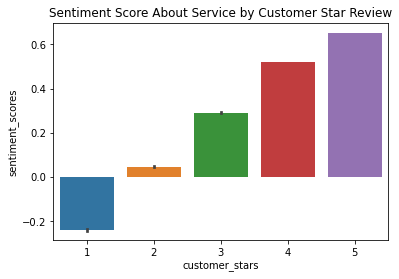

In [408]:
ax = sns.barplot(data=service_df, x='customer_stars', y='sentiment_scores')
ax.set_title('Sentiment Score About Service by Customer Star Review')
plt.show()